In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
images_dir = '/content/drive/MyDrive/AdvancedML/Homework1/Fig2.1/'

# Discrete Probability Distribution Plot

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 33.8 MB/s 
     |████████████████████████████████| 128 kB 80.9 MB/s 
     |████████████████████████████████| 88 kB 9.3 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 120 kB 81.9 MB/s 
     |████████████████████████████████| 1.6 MB 75.5 MB/s 
     |████████████████████████████████| 82 kB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 62.6 MB/s 


In [4]:
latexify(width_scale_factor=2)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


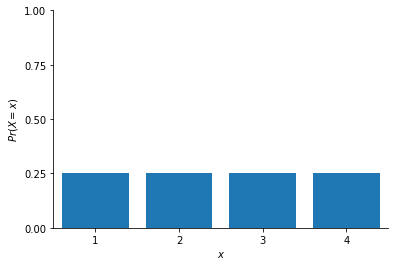

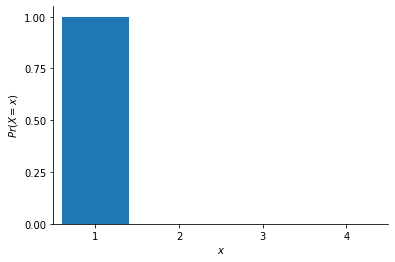

In [8]:
# Bar graphs showing a uniform discrete distribution and another with full mass on one value.

N = 4


def make_graph(probs, N, save_name, fig=None, ax=None):
    x = jnp.arange(1, N + 1)
    if fig is None:
        fig, ax = plt.subplots()
    ax.bar(x, probs, align="center")
    ax.set_xlim([min(x) - 0.5, max(x) + 0.5])
    ax.set_xticks(x)
    ax.set_yticks(jnp.linspace(0, 1, N + 1))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$Pr(X=x)$")
    sns.despine()
    if len(save_name) > 0:
        # savefig(save_name)
        plt.savefig(f"{images_dir}/{save_name}")
    return fig, ax


uniform_probs = jnp.repeat(1.0 / N, N)
_, _ = make_graph(
    uniform_probs, N, "uniform_histogram"
)  # Do not add .pdf or .png as it is automatically added by savefig method



delta_probs = jnp.array([1, 0, 0, 0])
_, _ = make_graph(delta_probs, N, "delta_histogram");

## Demo

You can see different examples of discrete distributions by changing the seed in the following demo.

In [10]:
from ipywidgets import interact


@interact(random_state=(1, 10), N=(2, 10))
def generate_random(random_state, N):
    key = jax.random.PRNGKey(random_state)
    probs = jax.random.uniform(key, shape=(N,))
    probs = probs / jnp.sum(probs)
    fig, ax = make_graph(probs, N, "")
    ax.set_yticks(jnp.linspace(0, 1, 11))

# plt.savefig(f"{images_dir}/seed.png")

interactive(children=(IntSlider(value=5, description='random_state', max=10, min=1), IntSlider(value=6, descri…

<Figure size 432x288 with 0 Axes>